In [1]:
# Exercise 1: Scikit-learn estimator

from sklearn.linear_model import LinearRegression

#Data
X = [[1],[2.1],[3]] #features
y =  [[1],[2],[3]] #target

#Create and fit the model
model = LinearRegression()
model.fit(X, y)

#Predict for new_input
x_pred = [[4]]
y_pred = model.predict(x_pred)

#Print results
print("Coefficients (coef_):", model.coef_)
print("Intercept (intercept_):", model.intercept_)
print("Score (R^2):", model.score(X, y))
print("Prediction for", x_pred, ":", y_pred)

Coefficients (coef_): [[0.99667774]]
Intercept (intercept_): [-0.02657807]
Score (R^2): 0.9966777408637874
Prediction for [[4]] : [[3.96013289]]


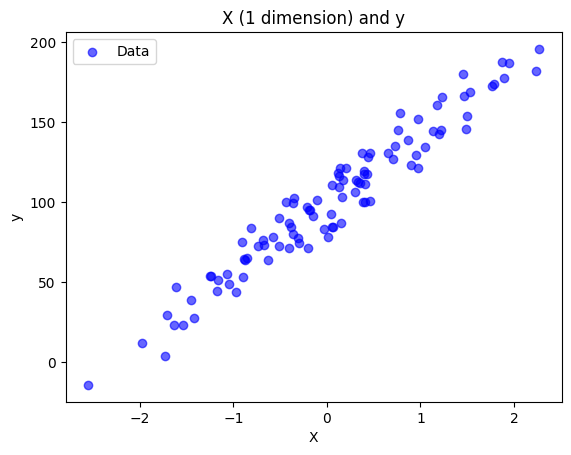



Equation of fitted line: y = 42.61943029136694 * x + 99.18581817296929




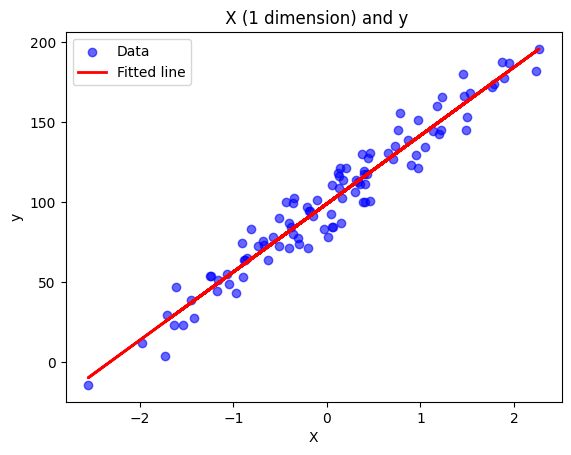

array([ 83.86186727, 140.80961751, 116.3333897 ,  64.52998689,
        61.34889539, 118.10301628,  57.5347917 , 117.44107847,
       108.06237908,  85.90762675])


MSE with noise=10: 114.17148616819486 

MSE with noise=50: 2854.2871542048706


In [2]:
#Exercise 2: Linear regression in 1D

import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import numpy as np

# 1. Generate the data
X, y, coef = make_regression(
    n_samples=100,
    n_features=1,
    n_informative=1,
    noise=10,
    coef=True,
    random_state=0,
    bias=100.0
)

# Scatter plot of data
plt.scatter(X, y, color="blue", alpha=0.6, label="Data")
plt.title("X (1 dimension) and y")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

print("\n")

#2. Fit LinearRegression
model = LinearRegression()
model.fit(X,y)

print(f"Equation of fitted line: y = {model.coef_[0]} * x + {model.intercept_}")
print("\n")

#3Plot with fitted line
y_pred = model.predict(X)
plt.scatter(X,y, color="blue", alpha=0.6, label="Data")
plt.plot(X, y_pred, color="red", linewidth=2, label="Fitted line")
plt.title(" X (1 dimension) and y")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

#4 Predict on X.
y_pred = model.predict(X)
print(repr(np.array(y_pred[:10])))
print("\n")

#5. Compute MSE function
def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

mse_10 = compute_mse(y, y_pred)
print("MSE with noise=10:", mse_10, "\n")

X2, y2, coef2 = make_regression(
    n_samples=100,
    n_features=1,
    n_informative=1,
    noise=50,
    coef=True,
    random_state=0,
    bias=100.0
)

model2 = LinearRegression()
model2.fit(X2, y2)
y2_pred = model2.predict(X2)


mse_50 = compute_mse(y2, y2_pred)
print("MSE with noise=50:", mse_50)



In [3]:
#3. Exercise 3: Train test split
import numpy as np
from sklearn.model_selection import train_test_split 

X = np.arange(1,21).reshape(10, -1)
y = np.arange(1,11)

X_train, y_train, X_test, y_test = train_test_split(
    X,y, test_size=0.2, shuffle=False
)
print("X_train:")
print(X_train,"\n")
print("X_test:")
print(y_train,"\n")
print("y_train:")
print(X_test,"\n")
print("y_test:")
print(y_test,"\n")

X_train:
[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]
 [13 14]
 [15 16]] 

X_test:
[[17 18]
 [19 20]] 

y_train:
[1 2 3 4 5 6 7 8] 

y_test:
[ 9 10] 



In [4]:
# Exercise 4: Forecast diabetes progression
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load diabetes dataset
diabetes =load_diabetes(as_frame=True)
X, y = diabetes.data, diabetes.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=43
)
print("(y_train.values[:10])")
print(y_train.values[:10], "\n")
print("y_test.values[:10]")
print(y_test.values[:10], "\n")

model = LinearRegression()
model.fit(X_train, y_train)

coefficients = model.coef_
intercept = model.intercept_

for name, coef in zip(X.columns, coefficients):
    print(f"{name}: {coef}")

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print("Train MSE:", mse_train)
print("Test MSE:", mse_test)

(y_train.values[:10])
[202.  55. 202.  42. 214. 173. 118.  90. 129. 151.] 

y_test.values[:10]
[ 71.  72. 235. 277. 109.  61. 109.  78.  66. 192.] 

age: -60.3998480933362
sex: -226.08359044269213
bmi: 529.3849571887339
bp: 259.9619941214204
s1: -859.093009334801
s2: 504.6869733896178
s3: 157.41085788032728
s4: 226.29313435521135
s5: 840.784040604922
s6: 34.71226555571711
Train MSE: 2888.324598377127
Test MSE: 2858.2915057597897
